# Introduction





#### About the project:
As a financial institution regulated by the FCA, Revolut has the obligation to verify the identity of all customers who want to open a bank account. Each prospective customer has to go through a Know Your Customer (KYC) process by submitting a government-issued photo ID and a facial picture of themself to our partner, Veritas. Veritas then would perform 2 checks:

- Document check: To verify that the photo ID is valid and authentic;
- Facial Similarity check: To verify that the face in the picture is the same with that on the submitted ID.

The customer will ‘pass’ the KYC process and get onboarded if the results of both Document and Facial Similarity checks are ‘clear’. If the result of any check is not ‘clear’, the customer has to submit all the photos again.

The “pass rate” is defined as the number of customers who pass both the KYC process divided by the number of customers who attempt the process. Each customer has up to 2 attempts.
The pass rate has decreased substantially in the recent period.

#### Ananlysis workflow:
- CSV file provided has ≈175k rows of data which makes it difficult to conduct any sort of analysis on Excel due to the program constantly crashing and the incredibly long processing time
- First, check if problem is there in a single report or both of them by understanding what the pass rate is and the degree to which the pass rate has fallen over the last few months using the “created_at” column.
- Each variable can then be evaluated to understand if the # of “Clears” per attempt decreases over time
- Depending on the outcome of this search, the variables that show a significant decrease in the # of “Clears” will be analysed in further detail
- Following that step, the “Properties” column will be separated into five columns: Gender, Nationality, Document Type, Date of Expiry and Issuing Country
- A correlation analysis will be conducted with each of these variables and the pass column to understand if there is any link between the two and identify the properties with the lowest pass rates
- It could be that specific document types are more prone to failing the checks for example, it could be that a passport from Ireland fails more often as the text on the passport is less clear or uses a font that makes it more difficult for the Veritas software to read
- To build the report, the data would need to be played around with to get to the root cause, which will ultimately be core to providing a recommended solution

In [15]:
# Importing necessary packages .. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Setting up plotting prefrences ..
sns.color_palette("Set2")
sns.set_style('whitegrid')

In [2]:
# Importing CSV files
df_face = pd.read_csv('facial_similarity_reports.csv')
df_doc = pd.read_csv('doc_reports.csv')

# Data Assessing

## Document Reports

In [3]:
# Assessing the data set
df_doc.head()

,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result
0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20T23:12:57Z,clear,NaN,NaN,clear,clear,NaN,050a0596de424fab83c433eaa18b3f8d,clear,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution
1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20T23:16:04Z,clear,NaN,NaN,clear,NaN,NaN,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear
2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20T17:59:49Z,clear,NaN,NaN,clear,clear,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear
3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20T17:59:38Z,clear,NaN,NaN,clear,clear,NaN,10a54a1ecf794404be959e030f11fef6,clear,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear
4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20T18:08:09Z,clear,NaN,NaN,clear,clear,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear


In [4]:
df_doc.shape

(176404, 18)

In [5]:
df_doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176404 entries, 0 to 176403
Data columns (total 18 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   user_id                             176404 non-null  object
 1   result                              176404 non-null  object
 2   visual_authenticity_result          150290 non-null  object
 3   image_integrity_result              176403 non-null  object
 4   face_detection_result               150261 non-null  object
 5   image_quality_result                176403 non-null  object
 6   created_at                          176404 non-null  object
 7   supported_document_result           175900 non-null  object
 8   conclusive_document_quality_result  95217 non-null   object
 9   colour_picture_result               95222 non-null   object
 10  data_validation_result              142974 non-null  object
 11  data_consistency_result             922

In [6]:
# Converting the created_at column to DateTime Object
df_doc.created_at = pd.to_datetime(df_doc.created_at)

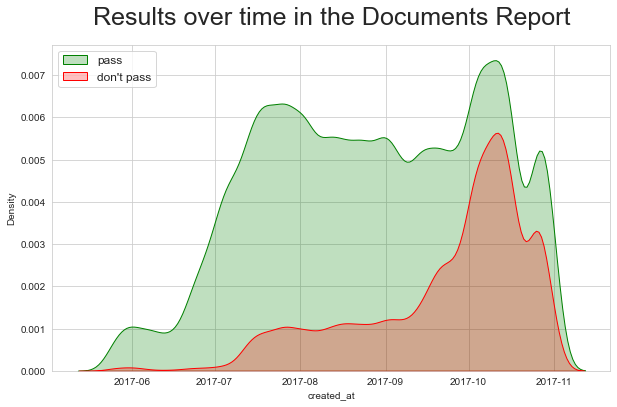

In [8]:
plt.figure(figsize=(10,6))
sns.kdeplot('created_at',hue='result',palette = ['r','g'],shade = True,data=df_doc);
plt.title('Results over time in the Documents Report',fontsize=25,pad= 20);
plt.legend(labels = ['pass',"don't pass"], fontsize='large', loc=2);

>#### Conclusion: There is a significant uptrend in the consideration results that appeared between 9/2017 and 10/2017.

## Facial Similarity Report

In [9]:
# Assessing the data set
df_face.head()

,user_id,result,face_comparison_result,created_at,facial_image_integrity_result,visual_authenticity_result,properties,attempt_id
0,ab23fae164e34af0a1ad1423ce9fd9f0,clear,clear,2017-06-20T23:12:58Z,clear,consider,{},050a0596de424fab83c433eaa18b3f8d
1,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20T23:16:04Z,clear,clear,{},f69c1e5f45a64e50a26740b9bfb978b7
2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20T17:59:49Z,clear,clear,{},f9f84f3055714d8e8f7419dc984d1769
3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20T17:59:39Z,clear,clear,{},10a54a1ecf794404be959e030f11fef6
4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20T18:08:09Z,clear,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9


In [10]:
df_face.shape

(176404, 8)

In [11]:
df_face.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176404 entries, 0 to 176403
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   user_id                        176404 non-null  object
 1   result                         176403 non-null  object
 2   face_comparison_result         166007 non-null  object
 3   created_at                     176404 non-null  object
 4   facial_image_integrity_result  175941 non-null  object
 5   visual_authenticity_result     150290 non-null  object
 6   properties                     176404 non-null  object
 7   attempt_id                     176404 non-null  object
dtypes: object(8)
memory usage: 10.8+ MB


In [12]:
# Converting the created_at column to DateTime Object
df_face.created_at = pd.to_datetime(df_face.created_at)

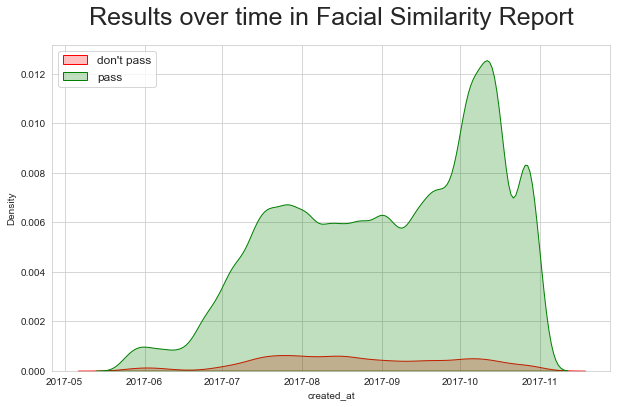

In [14]:
plt.figure(figsize=(10,6))
sns.kdeplot('created_at',hue='result',palette = ['g','r'],shade = True,data=df_face);
plt.title('Results over time in Facial Similarity Report',fontsize=25,pad= 20);
plt.legend(labels = ["don't pass",'pass'], fontsize='large', loc=2);

> #### Conclusion: It seems that every thing is fine here with no significant trends in the proportion of considerations

> ### The problem is in the Documents Report not The Facial Similarity Report.

# Trying to figure out where is the problem

In [18]:
df_doc.sample(5)

,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result
74715,0a79e15bf33a44c3812a9eadf18cb04c,clear,clear,clear,clear,clear,2017-10-05 10:03:28+00:00,clear,clear,clear,clear,NaN,NaN,f84e46122e0d445b889477e0b034800b,clear,clear,"{'gender': 'Male', 'issuing_date': '2017-08-16...",clear
160452,95f70f930ec94d65bcb6402147133788,clear,clear,clear,clear,clear,2017-07-20 20:53:03+00:00,clear,NaN,NaN,clear,clear,NaN,8381e1403f284c358b2b7e4d689103c1,clear,NaN,"{'gender': 'Male', 'nationality': 'ESP', 'docu...",clear
12826,9217c4c769fa456a93cdda2c1f197f17,clear,clear,clear,clear,clear,2017-10-12 17:59:12+00:00,clear,clear,clear,clear,clear,NaN,a2631f3925e94dd0a244ff63f1f1a00a,clear,clear,"{'gender': 'Female', 'nationality': 'LTU', 'do...",clear
102384,62242d573c4b4b93a183f1293a63caed,clear,clear,clear,clear,clear,2017-09-18 13:09:30+00:00,clear,clear,clear,clear,clear,NaN,2a356552411d4bc8843eea93365c309a,clear,NaN,"{'gender': 'Male', 'nationality': 'GBR', 'docu...",clear
86886,9762b5985c45477ca0acddc98b84591f,clear,clear,clear,clear,clear,2017-09-29 15:54:54+00:00,clear,clear,clear,clear,clear,NaN,008a9d3bc3c6417fae08d96c86d7002d,clear,clear,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear


> After thorough visual assessing, it seems like all the rows with result value of 'consider' have sub_result values other than 'clear'

In [19]:
# Testing if there is any clear results with non clear sub_results
df_doc.query('result == "clear"').query('sub_result != "clear"')

,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result


> Now we are sure that sub_result control the result column. Lets explore it much further!

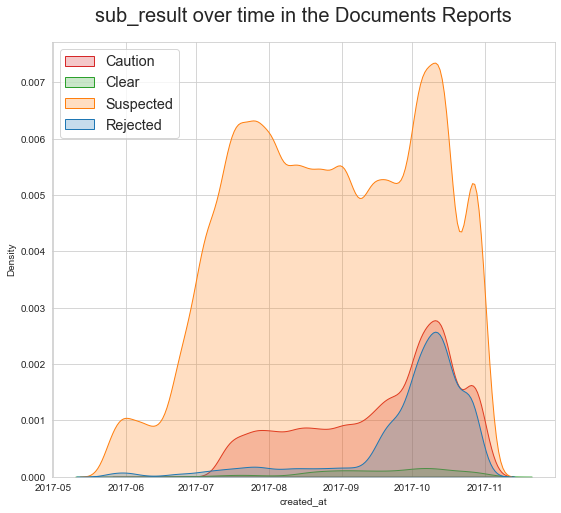

In [91]:
# plotting the proportion of sub_results values over time
plt.figure(figsize=(9,8))
sns.kdeplot('created_at',hue='sub_result',shade = True,data=df_doc);
plt.title('sub_result over time in the Documents Reports',fontsize=20, pad=20);
plt.legend(labels = ["Caution",'Clear', 'Suspected', 'Rejected'], fontsize='x-large', loc=2);

>- There are two uptrends in the proportion of the caution and rejected value
>- The sum of these trends looks like the uptrend in the consideration result in the Document Report 

> Now, We have to figure out what is creating these caution and rejected values..

## Expanding the properties column

In [17]:
# Extracting properties informantion .. 
df_doc['gender'] = df_doc.properties.str.extract(".*'gender': '(\w+)', .*")
df_doc['gender'] = df_doc['gender'].str.lower()

df_doc['nationality'] = df_doc.properties.str.extract(".*'nationality': '(\w+)', .*")
df_doc['nationality'] = df_doc['nationality'].str.upper()

df_doc['document_type'] = df_doc.properties.str.extract(".*'document_type': '(\w+)', .*")
df_doc['document_type'] = df_doc['document_type'].str.lower()

df_doc['date_of_expiry'] = df_doc.properties.str.extract(".*'date_of_expiry': '(.{10})', .*")

df_doc['issuing_country'] = df_doc.properties.str.extract(".*'issuing_country': '(\w+)'.*")
df_doc['issuing_country'] = df_doc['issuing_country'].str.upper()

# Convertting date_of_expiry into a datetime object
df_doc['date_of_expiry'] = pd.to_datetime(df_doc['date_of_expiry'],errors='coerce')

# Figuring out what causes the rejections

In [18]:
# Slicing the document report with only the data with sub_result of caution
df = df_doc.query('sub_result == "rejected"')

In [19]:
df.sample(5)

,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,attempt_id,police_record_result,compromised_document_result,properties,sub_result,gender,nationality,document_type,date_of_expiry,issuing_country
39425,e002539d43564f32a16c5024822de51b,consider,NaN,consider,NaN,unidentified,2017-10-18 21:05:12+00:00,clear,NaN,NaN,...,700394ecc1574c8c96ba08f8f9c72ecd,NaN,NaN,{},rejected,NaN,NaN,NaN,NaT,NaN
63901,fd8cac98b2274caab8dbfe441c0cb475,consider,NaN,consider,NaN,clear,2017-10-26 07:16:32+00:00,unidentified,NaN,NaN,...,f1664ba017de4df89d197fa16eaf44ab,NaN,NaN,{},rejected,NaN,NaN,NaN,NaT,NaN
39974,ff65063585a14cca8214cf3c071eec26,consider,NaN,consider,NaN,unidentified,2017-10-18 20:44:37+00:00,clear,NaN,NaN,...,88564b9d95934bb4b03932045a3e1159,NaN,NaN,{},rejected,NaN,NaN,NaN,NaT,NaN
6630,6086850accbf42c8aa26bc598d0aaee1,consider,NaN,consider,NaN,unidentified,2017-10-28 15:17:58+00:00,clear,NaN,NaN,...,f0db16f68bba49279aefa19643590d16,NaN,NaN,{},rejected,NaN,NaN,NaN,NaT,NaN
131049,ae7569847950467293fa99deb34a39df,consider,NaN,consider,NaN,unidentified,2017-08-24 15:44:20+00:00,clear,NaN,NaN,...,b9b1683673cd445f9020782af342df46,NaN,NaN,{},rejected,NaN,NaN,NaN,NaT,NaN


> The Visual Assesment shows alot of Nans and empty properties values

In [20]:
# Calculating the proportion of the rejection to have missing properties..
(df_doc.query('sub_result == "rejected"').properties == "{}").mean()

0.9994633959371406

In [21]:
# Calculating the proportion of the rejection to have missing properties..
(df_doc.query('properties == "{}"').sub_result != "rejected").mean()

0.0008429764732929727

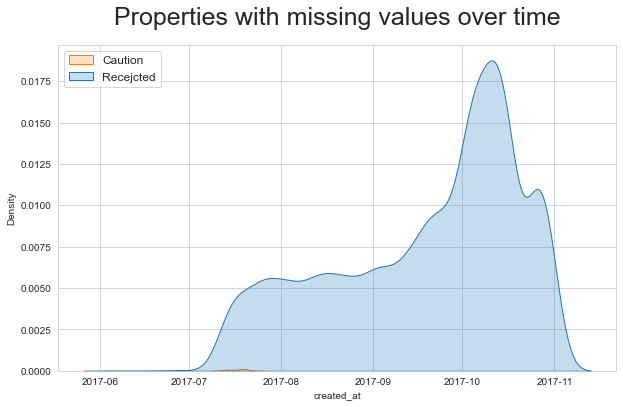

In [22]:
plt.figure(figsize=(10,6))
sns.kdeplot('created_at',hue='sub_result',shade = True,data=df_doc.query('properties == "{}"'));
plt.title('Properties with missing values over time',fontsize=25,pad= 20);
plt.legend(labels = ["Caution",'Recejcted'], fontsize='large', loc=2);

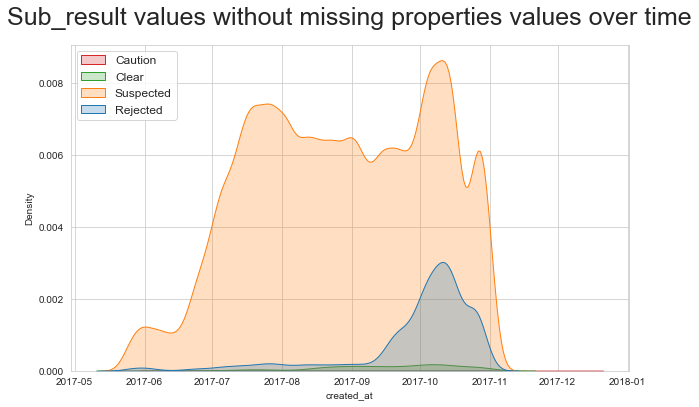

In [26]:
# Checking if we cut out the missing values in properties .. the rejection would disappear?
plt.figure(figsize=(10,6))
sns.kdeplot('created_at',hue='sub_result',shade = True,data=df_doc.query('properties != "{}"'));
plt.title('Sub_result values without missing properties values over time',fontsize=25,pad= 20);
plt.legend(labels = ["Caution", 'Clear','Suspected',"Rejected"], fontsize='large', loc=2);

> ### There is a strong association between getting a rejection and properties value being missing. 

# Figuring out what causes the cautions

In [27]:
# Slicing the document report with only the data with sub_result of caution
df = df_doc.query('sub_result == "caution"')

In [28]:
df.sample(5)

,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,attempt_id,police_record_result,compromised_document_result,properties,sub_result,gender,nationality,document_type,date_of_expiry,issuing_country
41812,490be255584944e39ae90c33fa2b2aef,consider,clear,consider,clear,clear,2017-10-17 17:30:49+00:00,clear,consider,clear,...,5251ef7f344947a0af69ff4c92bb8002,clear,clear,"{'gender': 'Female', 'issuing_date': '2016-08-...",caution,female,NaN,driving_licence,2026-08-24,GBR
62776,f04503fcc8cf4c9b9db489e1b4ab177c,consider,clear,consider,clear,clear,2017-10-13 16:53:41+00:00,clear,consider,clear,...,18e18a0ee36e49d489bae55006910490,clear,NaN,"{'gender': 'Female', 'issuing_date': '2015-01-...",caution,female,NaN,driving_licence,2025-01-12,GBR
18155,fe76d2a5964e4ebb898b045a049b57ca,consider,clear,consider,clear,clear,2017-10-10 16:51:05+00:00,clear,consider,clear,...,148cbae2001a400e9e925e65fd9b5d65,clear,clear,"{'gender': 'Male', 'nationality': 'CZE', 'docu...",caution,male,CZE,passport,2027-07-03,CZE
83670,be1dc4b794cf4d38b8fe893004033b94,consider,clear,consider,clear,clear,2017-10-01 17:40:24+00:00,clear,consider,clear,...,9cc2a23bf8b2477195cd340631f35506,clear,clear,"{'issuing_date': '2011-04-20', 'document_type'...",caution,NaN,NaN,driving_licence,2021-04-20,ITA
31298,0a441ff4542146a899a795e1aa7be0e9,consider,clear,clear,clear,clear,2017-07-02 09:14:59+00:00,clear,NaN,NaN,...,d45c94fabe1f4ecfbbad8f6b19222698,clear,NaN,"{'gender': 'Male', 'document_type': 'driving_l...",caution,male,NaN,driving_licence,2006-06-20,POL


### Testing with issuing_country

In [52]:
natt = df_doc.issuing_country.value_counts()[:50].index
natt

Index(['GBR', 'FRA', 'LTU', 'ESP', 'IRL', 'POL', 'PRT', 'ITA', 'DEU', 'GRC',
       'CHE', 'NLD', 'ROU', 'BEL', 'HUN', 'CZE', 'LVA', 'SVN', 'BGR', 'GIB',
       'SWE', 'AUT', 'CYP', 'MLT', 'USA', 'AUS', 'IND', 'SVK', 'DNK', 'NZL',
       'EST', 'RUS', 'NOR', 'HRV', 'TWN', 'CHN', 'FIN', 'BRA', 'JEY', 'CAN',
       'PHL', 'MAR', 'MYS', 'UKR', 'SGP', 'ZAF', 'TUR', 'MEX', 'LUX', 'COL'],
      dtype='object')

In [53]:
print('Proportion of cautions\nfor every issuing \ncountrythat had more\nthan 100 visitors ..')
a=df_doc.query("sub_result =='caution'").groupby('issuing_country')['user_id'].count() / df_doc.groupby('issuing_country')['user_id'].count()
a.sort_values(ascending=False)
b=[]
for i,j in a.items():
    if i in natt:
        tst= {}
        tst['Country']=i
        tst['rate']=j
        b.append(tst)
df_nat = pd.DataFrame(b)
df_nat.sort_values(by=['rate'],ascending=False)

Proportion of cautions
for every issuing 
countrythat had more
than 100 visitors ..


,Country,rate
17,GBR,0.143973
29,MAR,0.143617
1,AUT,0.142287
23,IRL,0.129333
24,ITA,0.127995
30,MEX,0.123810
28,LVA,0.120607
22,IND,0.116105
12,DNK,0.113360
11,DEU,0.108706


### Testing with Nationality

In [54]:
df_doc.nationality.value_counts()

GBR    12652
ESP     7763
LTU     7569
FRA     6689
POL     6143
       ...  
TJK        1
MNE        1
O7I        1
AVN        1
ESO        1
Name: nationality, Length: 200, dtype: int64

In [57]:
natt = df_doc.nationality.value_counts()[:50].index
natt

Index(['GBR', 'ESP', 'LTU', 'FRA', 'POL', 'IRL', 'PRT', 'DEU', 'ITA', 'CHE',
       'ROU', 'NLD', 'BEL', 'HUN', 'GRC', 'LVA', 'CZE', 'IND', 'SVN', 'BGR',
       'TWN', 'MLT', 'AUS', 'AUT', 'RUS', 'USA', 'CHN', 'SVK', 'NZL', 'HRV',
       'SWE', 'BRA', 'EST', 'CYP', 'PHL', 'MAR', 'DNK', 'UKR', 'CAN', 'MYS',
       'FIN', 'TUR', 'NOR', 'MEX', 'KOR', 'DZA', 'ZAF', 'TUN', 'JPN', 'COL'],
      dtype='object')

In [59]:
print('Proportion of cautions for every nationality countrythat had more than 100 visitors ..')
a=df_doc.query("sub_result =='caution'").groupby('nationality')['user_id'].count() / df_doc.groupby('nationality')['user_id'].count()
a.sort_values(ascending=False)
b=[]
for i,j in a.items():
    if i in natt:
        tst= {}
        tst['Country']=i
        tst['rate']=j
        b.append(tst)
df_nat = pd.DataFrame(b)
df_nat.sort_values(by=['rate'],ascending=False)

Proportion of cautions for every nationality countrythat had more than 100 visitors ..


,Country,rate
1,AUT,0.184154
44,TUN,0.180952
29,MAR,0.175214
34,NOR,0.170543
12,DNK,0.167421
18,GBR,0.154442
17,FRA,0.152489
23,IRL,0.148678
16,FIN,0.142857
28,LVA,0.142544


### Testing with document type

In [60]:
print('Proportion of cautions for every document type ..')
df_doc.query("sub_result =='caution'").groupby('document_type')['user_id'].count() / df_doc.groupby('document_type')['user_id'].count()


Proportion of cautions for every document type ..


document_type
birth_certificate              NaN
driving_licence           0.107304
national_identity_card    0.075055
passport                  0.146964
residence_permit          0.083988
tax_id                         NaN
voter_id                       NaN
work_permit               0.058824
Name: user_id, dtype: float64

### Testing with gender

In [61]:
print('Proportion of cautions for every gender ..')
df_doc.query("sub_result =='caution'").groupby('gender')['user_id'].count() / df_doc.groupby('gender')['user_id'].count()


Proportion of cautions for every gender ..


gender
8              NaN
female    0.114910
male      0.113485
Name: user_id, dtype: float64

### Testing with date of expiry

In [63]:
df_doc.date_of_expiry.describe()

<ipython-input-63-5f0b7afceb63>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_doc.date_of_expiry.describe()


count                  129109
unique                   6382
top       2027-05-17 00:00:00
freq                       86
first     1929-10-15 00:00:00
last      2077-12-04 00:00:00
Name: date_of_expiry, dtype: object

In [86]:
print('Proportion of sub_result of expired documents')
df_doc.query('date_of_expiry < "2017-05"').groupby('sub_result')['user_id'].count() / df_doc.query('date_of_expiry < "2017-05"').user_id.count()

Proportion of sub_result of expired documents


sub_result
caution      0.924641
clear        0.034689
suspected    0.040670
Name: user_id, dtype: float64

In [85]:
 df_doc.query('date_of_expiry < "2017-05"').user_id.count()

836

> There is a strong corelation but it doesn't have a significant effect

In [93]:
print('Proportion of sub_result of documents with expiry date later than 2027')
df_doc.query('date_of_expiry > 2027').groupby('sub_result')['user_id'].count() / df_doc.query('date_of_expiry > 2027').user_id.count()

Proportion of sub_result of documents with expiry date later than 2027


sub_result
caution      0.099799
clear        0.888729
rejected     0.000063
suspected    0.011409
Name: user_id, dtype: float64

In [91]:
 df_doc.query('date_of_expiry > 2027').user_id.count()

15952

> The module is reading alot of documents which have a not resonable expiry date but it's not triggering cautions

C:\Users\Islam\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


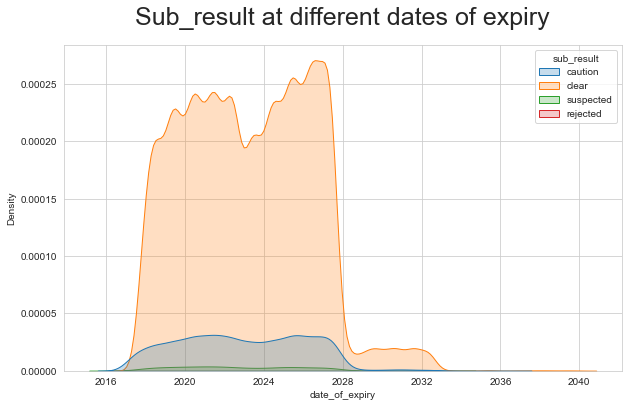

In [106]:
# Checking if there is a haigher proportion in cautions with a specific date of expiry
plt.figure(figsize=(10,6))
sns.kdeplot('date_of_expiry',hue='sub_result',shade = True,data=df_doc.query('date_of_expiry > 2017 and date_of_expiry < 2040'));
plt.title('Sub_result at different dates of expiry',fontsize=25,pad= 20);

# Conclusion

- The Facial Similarity module is working fine.
 
- The Documents module is the one with the issues and its final result is highly connected to the column of sub_results showing clear, caution, rejected, and suspected.

- There is an uptrend in the caution and rejected outputs that is causing a significant decrease in the pass rate over time.

- The rejections are highly connected to both the data and the properties being missing.

- There is a clear correlation between the cautions and the conclusive_document_quality_result column outputting consider.

- There is no clear relation between the cautions and the properties available and I suspect that there might be related to non-collected parameters (e.g. race).